In [33]:
#importing the required modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sbn 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [47]:
#loading the dataset
data = pd.read_csv('diabetes.csv')

In [49]:
#Exploratory data analysis
data.head()
#there are certain null values in columns like insulin, bmi, skin thickness where it does not make #sense. These are missing values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
data.shape
#there are 768 rows and 9 columns

(768, 9)

In [16]:
data.describe()
#the mean, median, standard deviation, inter quartile distribution, min-max values are displayed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
data.info()
#we can see the columns and it's datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
#removing the missing values (0) and replacing with NaN
data_cleaned = data.copy()
data_cleaned[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_cleaned[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(data_cleaned.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


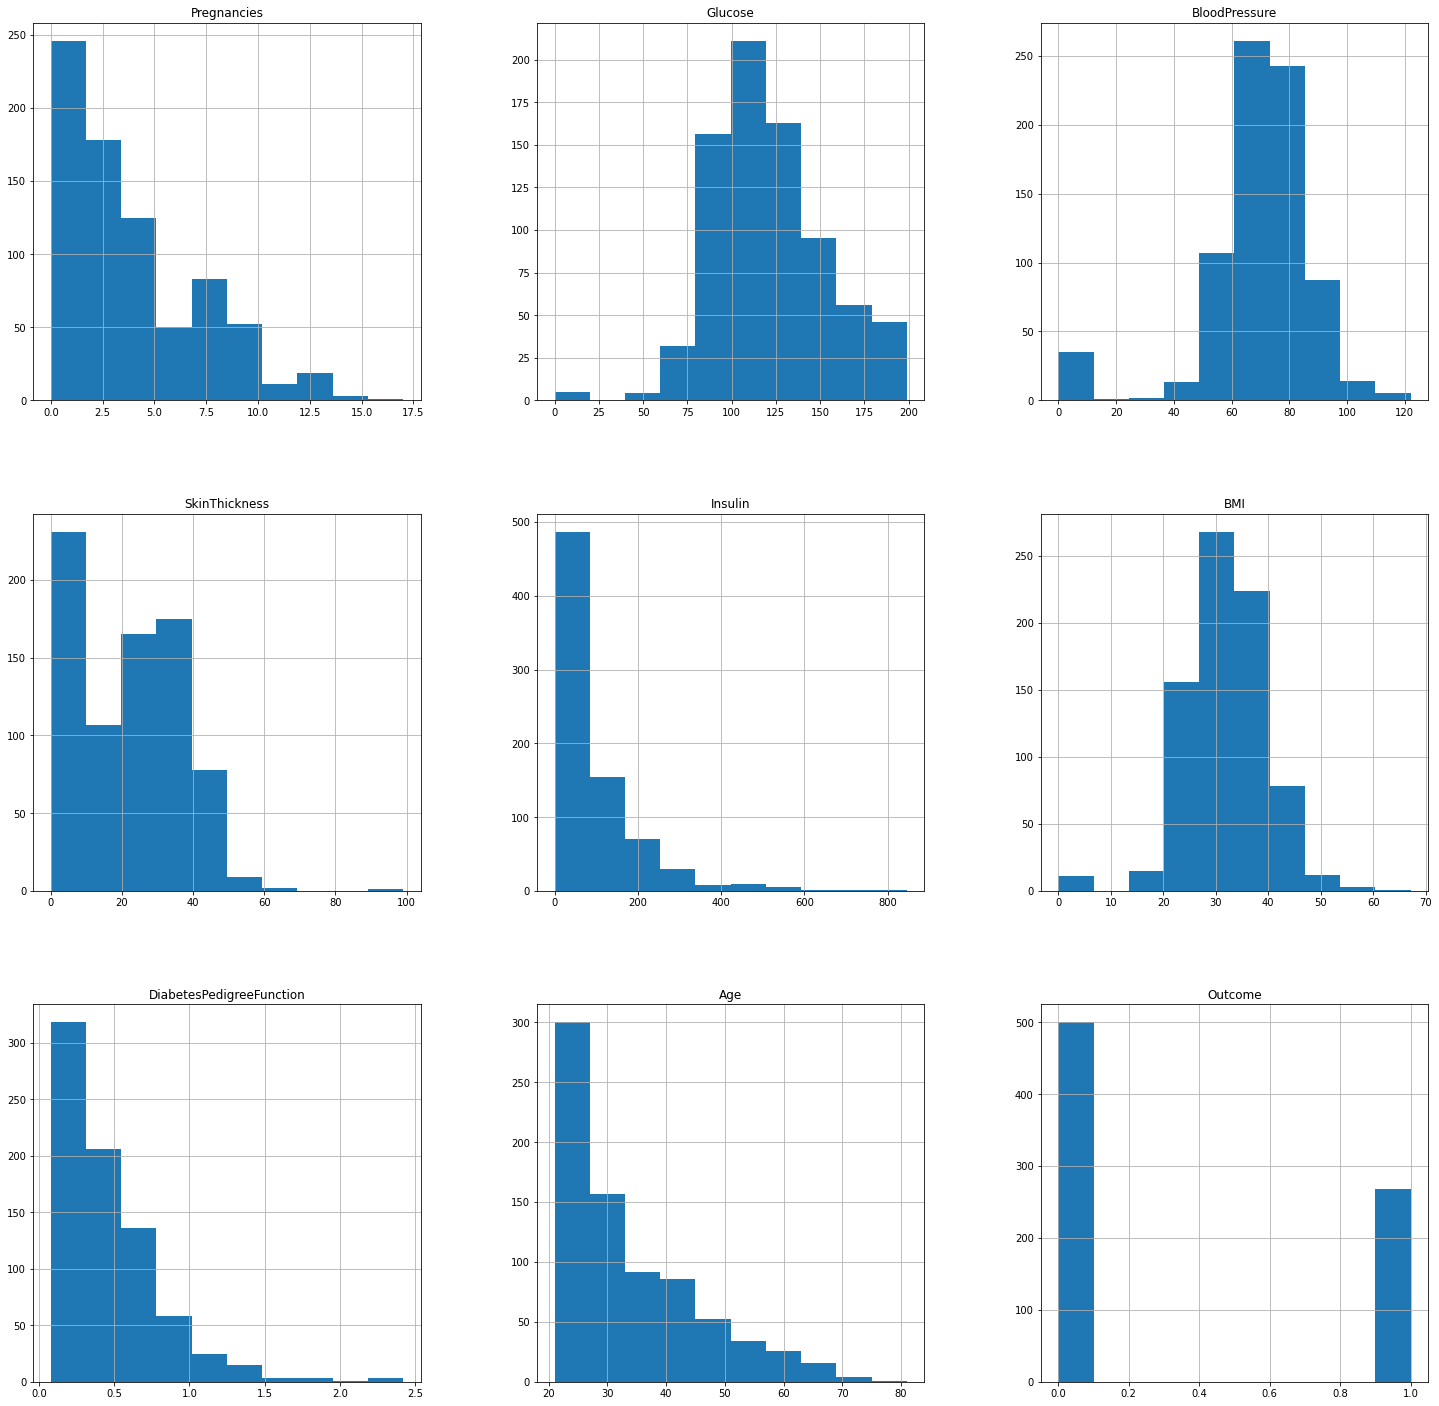

In [19]:
plot = data.hist(figsize= (25,25))

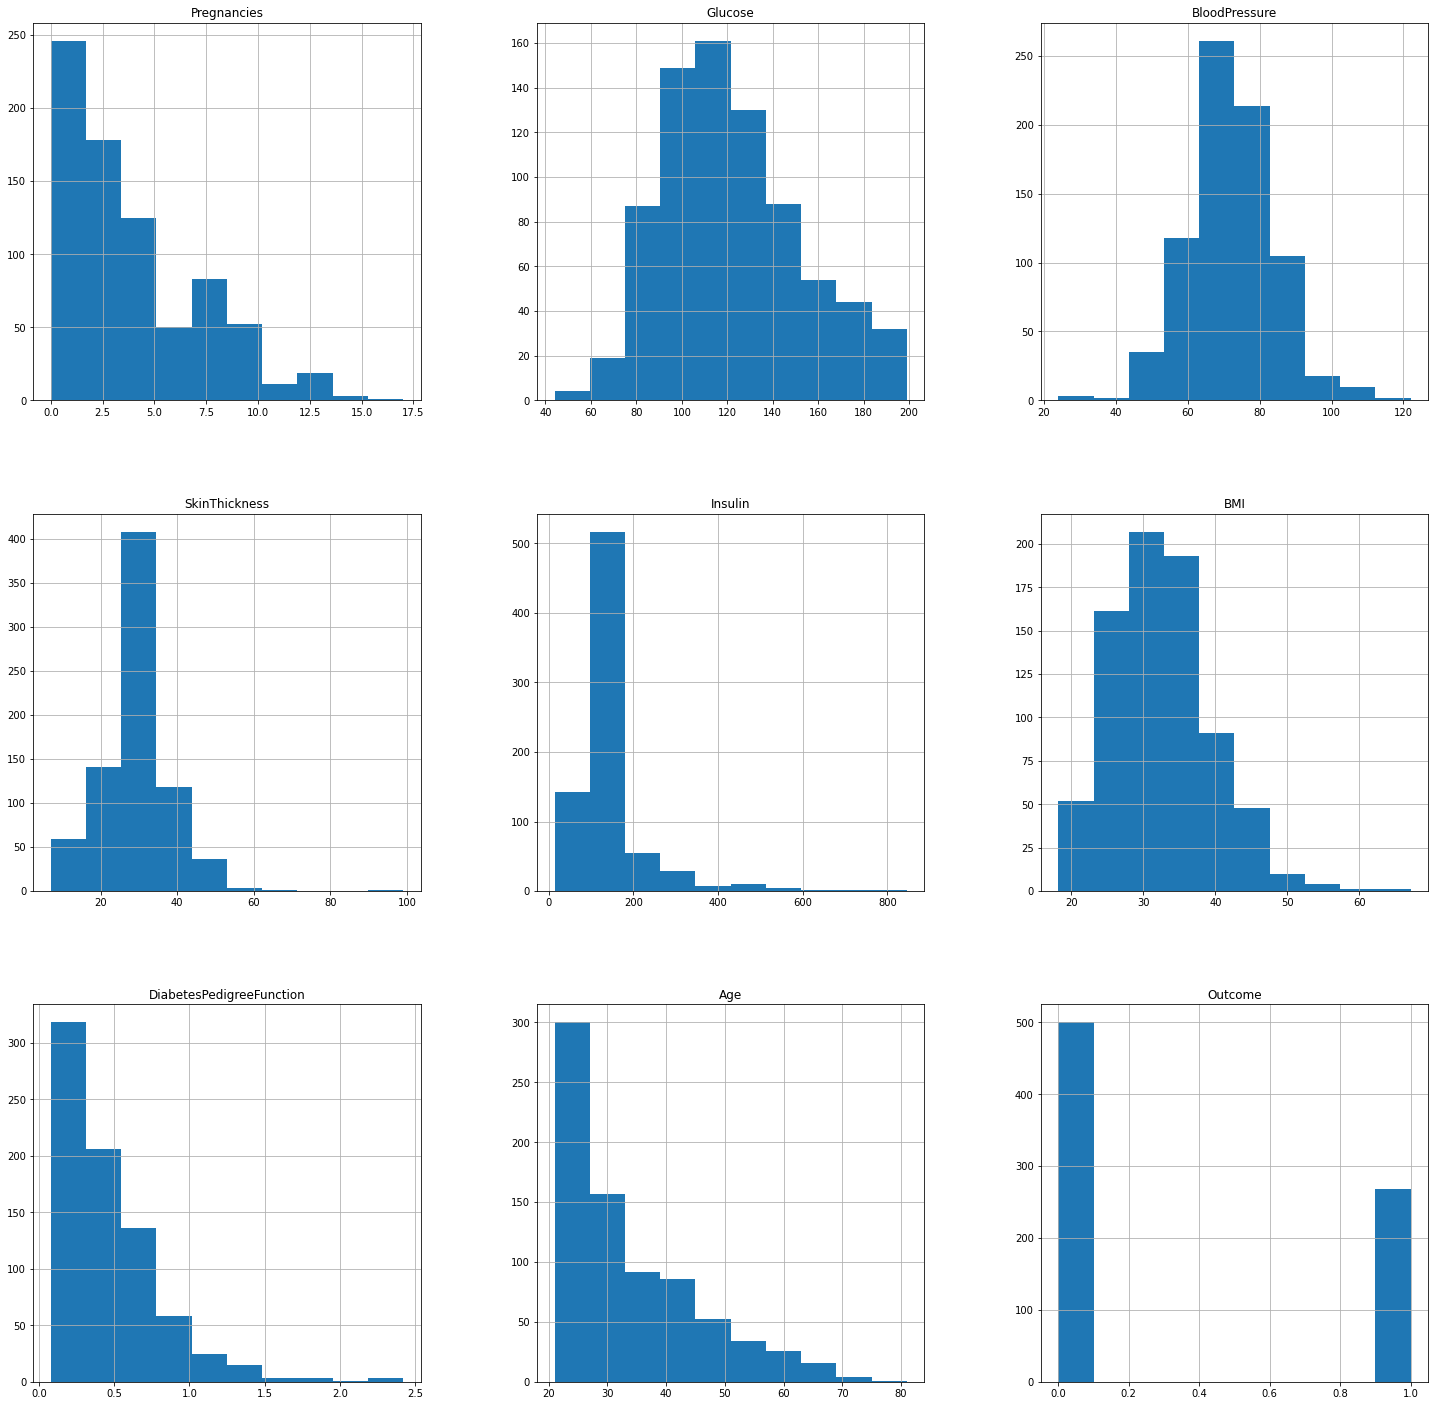

In [20]:
#imputing the missing values in accordance with the frequency distribution of data in each column
#imputing with mean for the features that resemble normal distribution
#imputing with median for the features with skewness
data_cleaned['Glucose'].fillna(data_cleaned['Glucose'].mean(),inplace = True)
data_cleaned['BloodPressure'].fillna(data_cleaned['BloodPressure'].mean(),inplace = True)
data_cleaned['BMI'].fillna(data_cleaned['BMI'].mean(),inplace = True)
data_cleaned['SkinThickness'].fillna(data_cleaned['SkinThickness'].median(),inplace = True)
data_cleaned['Insulin'].fillna(data_cleaned['Insulin'].median(),inplace = True)

plot = data_cleaned.hist(figsize =(25,25))

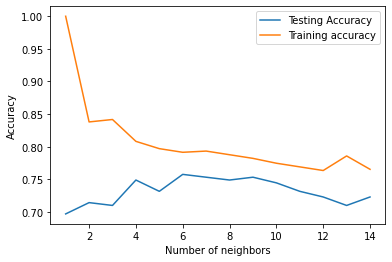

In [26]:
#declaring the dependant and independant variables
x = data_cleaned.drop('Outcome', axis = 1).values
y = data_cleaned['Outcome'].values

#splitting test and training data
#30% of the dataset is kept aside for the test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=227)

#creating arrays to store the accuracy for each n_neighbor
neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#creating a classifier and storing the accuracies with each n_neighbor
for i,k in enumerate(neighbors):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train, y_train)
    train_accuracy[i] = classifier.score(x_train, y_train)
    test_accuracy[i] = classifier.score(x_test, y_test) 

#plotting the accuracy of each n_neighbour to select the best one
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [52]:
#building the classifier and fitting the training data
classifier = KNeighborsClassifier(n_neighbors = 6)
classifier.fit(x_train,y_train)
classifier.score(x_test,y_test)
#we get an accuracy of 75.76%

0.7575757575757576

In [53]:
y_prediction = classifier.predict(x_test)
confusion_matrix(y_test,y_prediction)
#acccording to the confusion matrix:
#True negative = 123
#False positive = 36
#True positive = 52
#False negative = 37

array([[123,  19],
       [ 37,  52]], dtype=int64)

In [54]:
#Hyperparameter tuning using GridSearchCV
#n_neighbors is the parameter to be tuned
parameter_grid = {'n_neighbors':np.arange(1,50)}
classifier = KNeighborsClassifier()
classifier_cv= GridSearchCV(classifier,parameter_grid,cv=5)
classifier_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [44]:
classifier_cv.best_score_
#best score comes as 74.11%

0.74110418830045

In [56]:
classifier_cv.best_params_
#best parameter(n_neighbor) comes as 6 
#coincidentally, this matches with our rough estimate from the graph of accuracies n_neighbors 1 to 14

{'n_neighbors': 6}

In [ ]:
#therefore, we get an accuracy of roughly 75% using K nearest neighbor algorithm to predict diabetes from diagnostic information